In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [92]:
tickers = ['RELIANCE.NS','HDFCBANK.NS', 'BHARTIARTL.NS','ADANIPORTS.NS','ITC.NS','INFY.NS','TCS.NS','LICI.NS','LT.NS','HCLTECH.NS']
data = yf.download(tickers, start='2024-01-01', end='2025-01-01', progress=False)
data.head()

/tmp/ipython-input-2984244413.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2024-01-01', end='2025-01-01', progress=False)


Price              Close                                                       \
Ticker     ADANIPORTS.NS BHARTIARTL.NS   HCLTECH.NS  HDFCBANK.NS      INFY.NS   
Date                                                                            
2024-01-01   1038.321777    999.083496  1395.694702  1656.995361  1491.409424   
2024-01-02   1068.594116   1007.614319  1382.337524  1657.971069  1475.114258   
2024-01-03   1084.299927   1020.928162  1352.424561  1632.405273  1432.429810   
2024-01-04   1112.986572   1033.453125  1335.681030  1649.920776  1454.252686   
2024-01-05   1143.754272   1032.171021  1347.768433  1641.480103  1473.335693   

Price                                                                      \
Ticker          ITC.NS     LICI.NS        LT.NS  RELIANCE.NS       TCS.NS   
Date                                                                        
2024-01-01  438.121033  839.694336  3465.631348  1290.744263  3702.444824   
2024-01-02  440.273987  819.111450  3379.763672  1301.432983  3675.340576   
2024-01-03  446.732788  820.138123  3381.975342  1287.281006  3586.497559   
2024-01-04  445.937103  816.715820  3400.013916  1293.933350  3562.259033   
2024-01-05  443.643799  825.662781  3462.141602  1299.439697  3631.332031   

Price       ...        Volume                                                \
Ticker      ... ADANIPORTS.NS BHARTIARTL.NS HCLTECH.NS HDFCBANK.NS  INFY.NS   
Date        ...                                                               
2024-01-01  ...       3989711       3804406    1222315     7119843  2808451   
2024-01-02  ...       6344621       6865791    1440888    14621046  5396313   
2024-01-03  ...      33060778       3604276    1651716    14194881  7550363   
2024-01-04  ...       9771995       4664043    3392241    13367028  7056038   
2024-01-05  ...      10622789       4008221    1776925    15944735  8895403   

Price                                                        
Ticker        ITC.NS  LICI.NS    LT.NS RELIANCE.NS   TCS.NS  
Date                                                         
2024-01-01   9346277  6424762   777080     4030540   825907  
2024-01-02  10519771  3672560  1511464     7448800  1344068  
2024-01-03  24036012  3684845  1283859     9037536  1803075  
2024-01-04  11786959  2024609  1651616     9612778  3598144  
2024-01-05   9209405  4193233  2069018     8086406  1963127  

[5 rows x 50 columns]

In [93]:
data.index.name = 'Date'
data = data.reset_index()
data.columns = ['Date' if col[0] == 'Date' else f"{col[0]}|{col[1]}" for col in data.columns]
data_melted = data.melt(id_vars='Date', var_name='Attribute_Ticker', value_name='value')
data_melted[['Attribute', 'Ticker']] = data_melted['Attribute_Ticker'].str.split('|', expand=True)
stock_data = data_melted.pivot_table(index=['Date', 'Ticker'],columns='Attribute',values='value',aggfunc='first').reset_index()
stock_data.columns.name = None
stock_data.head()

,Date,Ticker,Close,High,Low,Open,Volume
0,2024-01-01,ADANIPORTS.NS,1038.321777,1048.329913,1013.697765,1017.215533,3989711.0
1,2024-01-01,BHARTIARTL.NS,999.083496,1017.722894,993.116917,1017.722894,3804406.0
2,2024-01-01,HCLTECH.NS,1395.694702,1406.982545,1368.697991,1373.354180,1222315.0
3,2024-01-01,HDFCBANK.NS,1656.995361,1667.777930,1651.043043,1664.704156,7119843.0
4,2024-01-01,INFY.NS,1491.409424,1496.841144,1475.931514,1479.536623,2808451.0


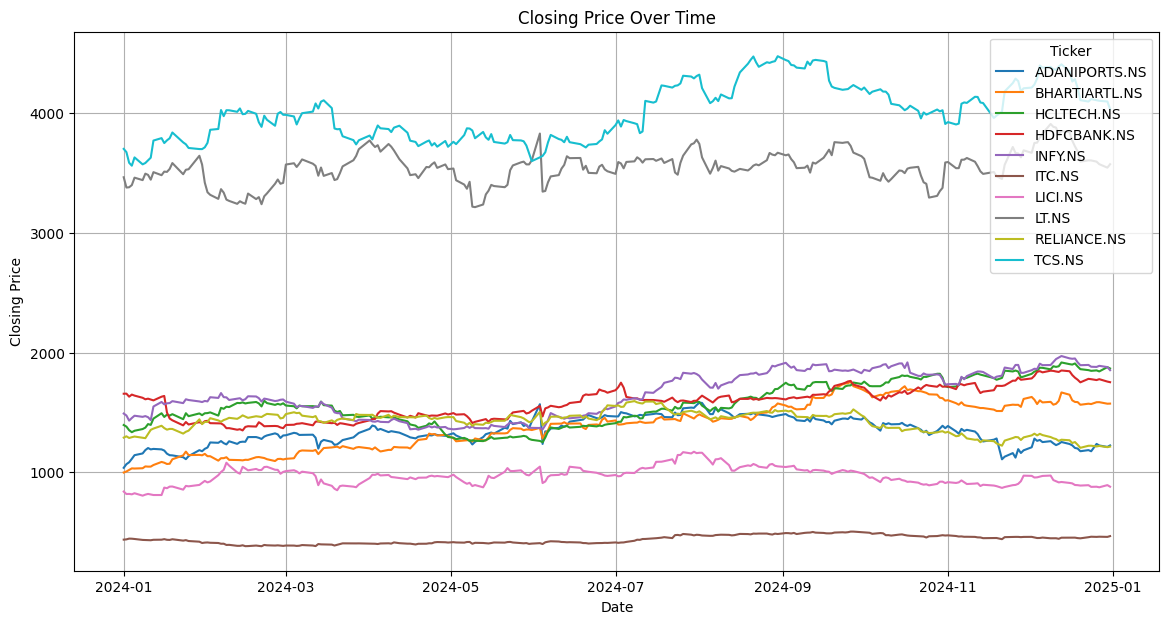

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))

sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()

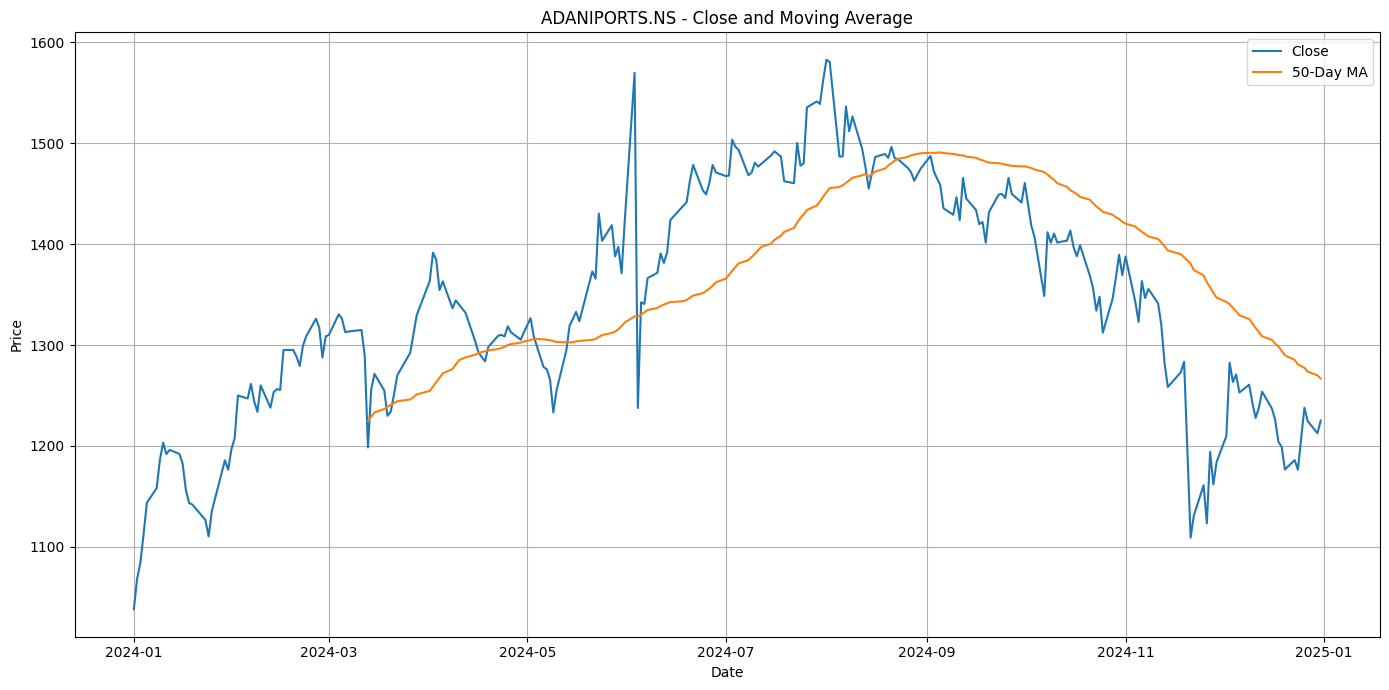

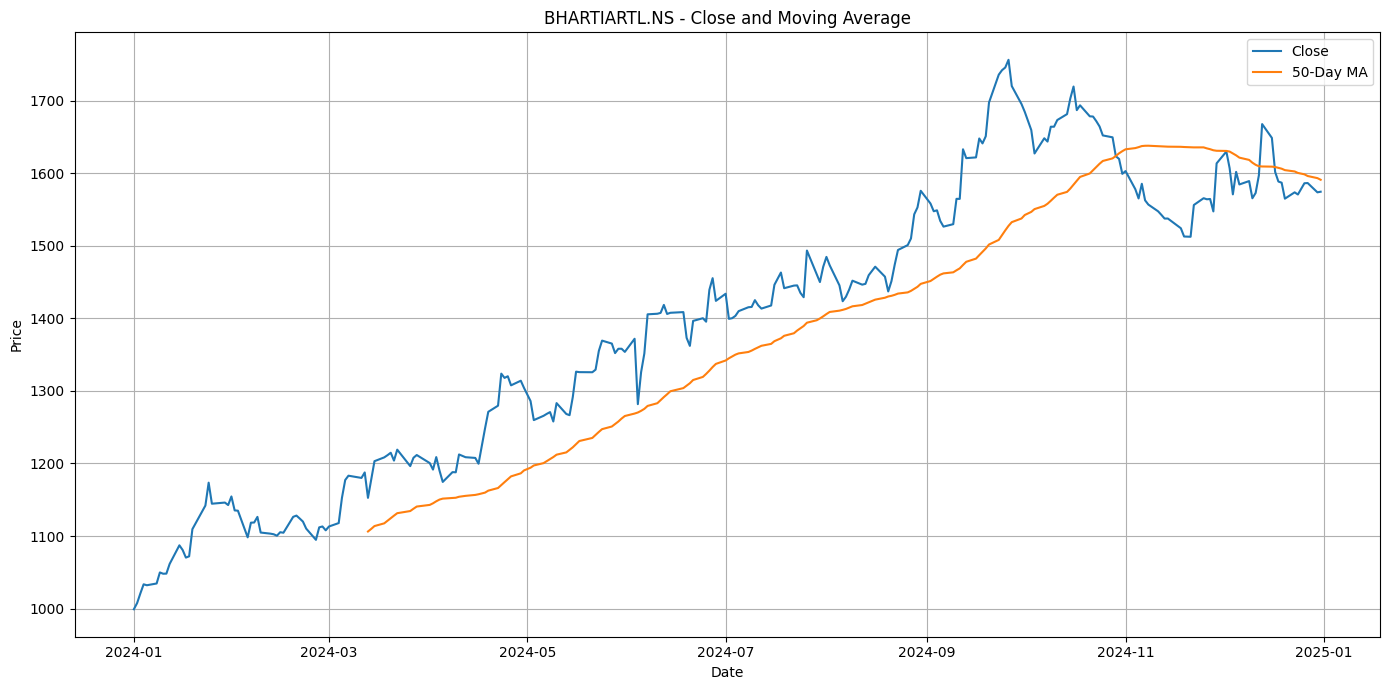

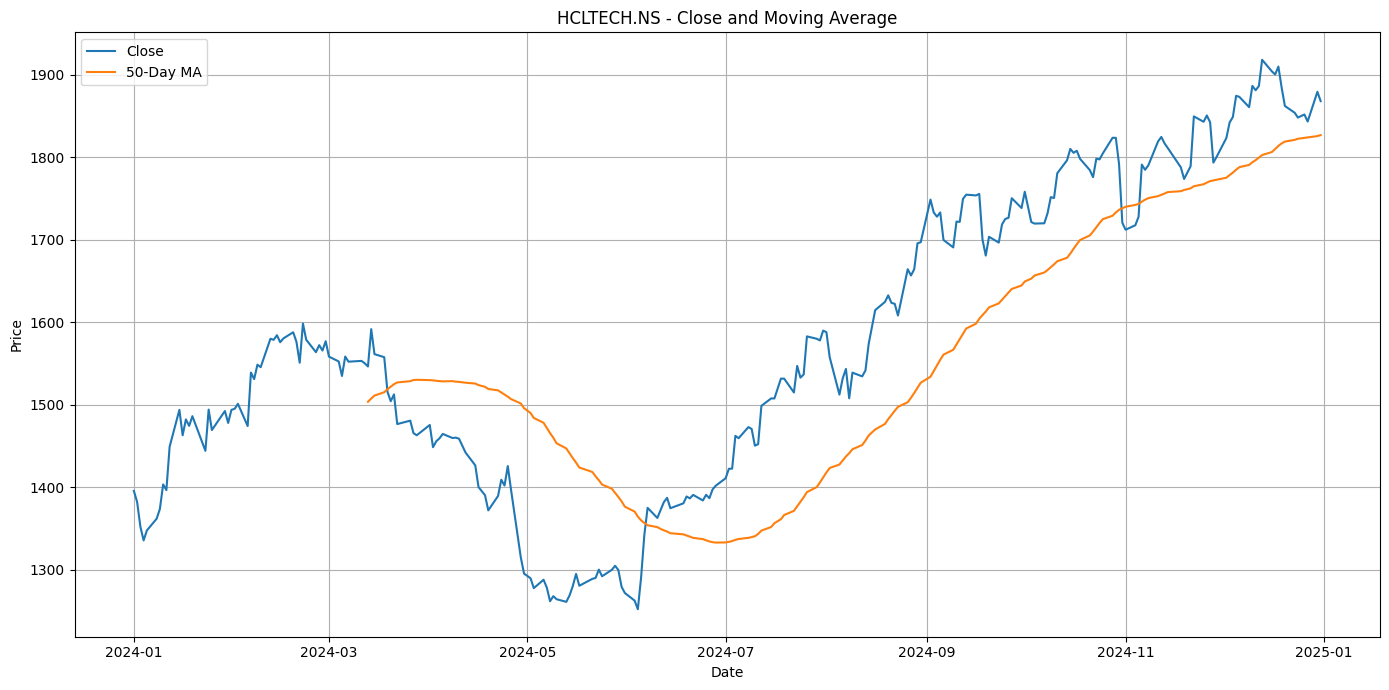

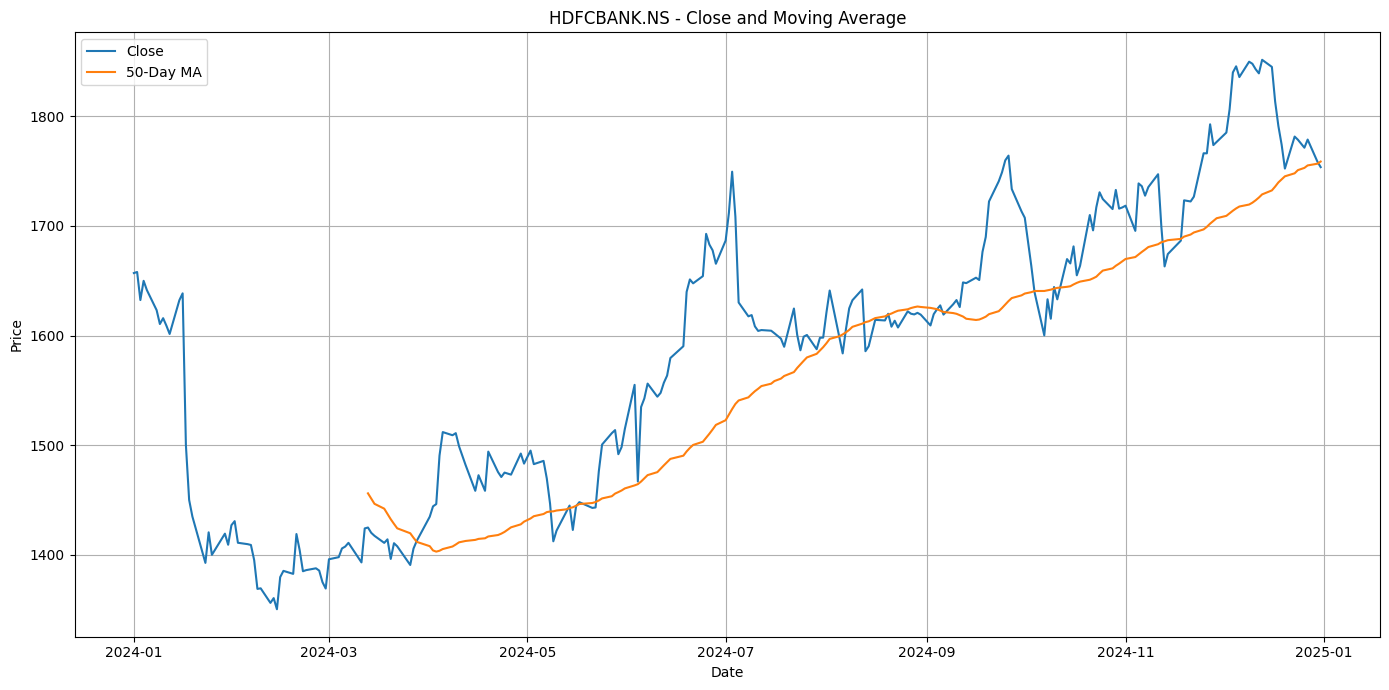

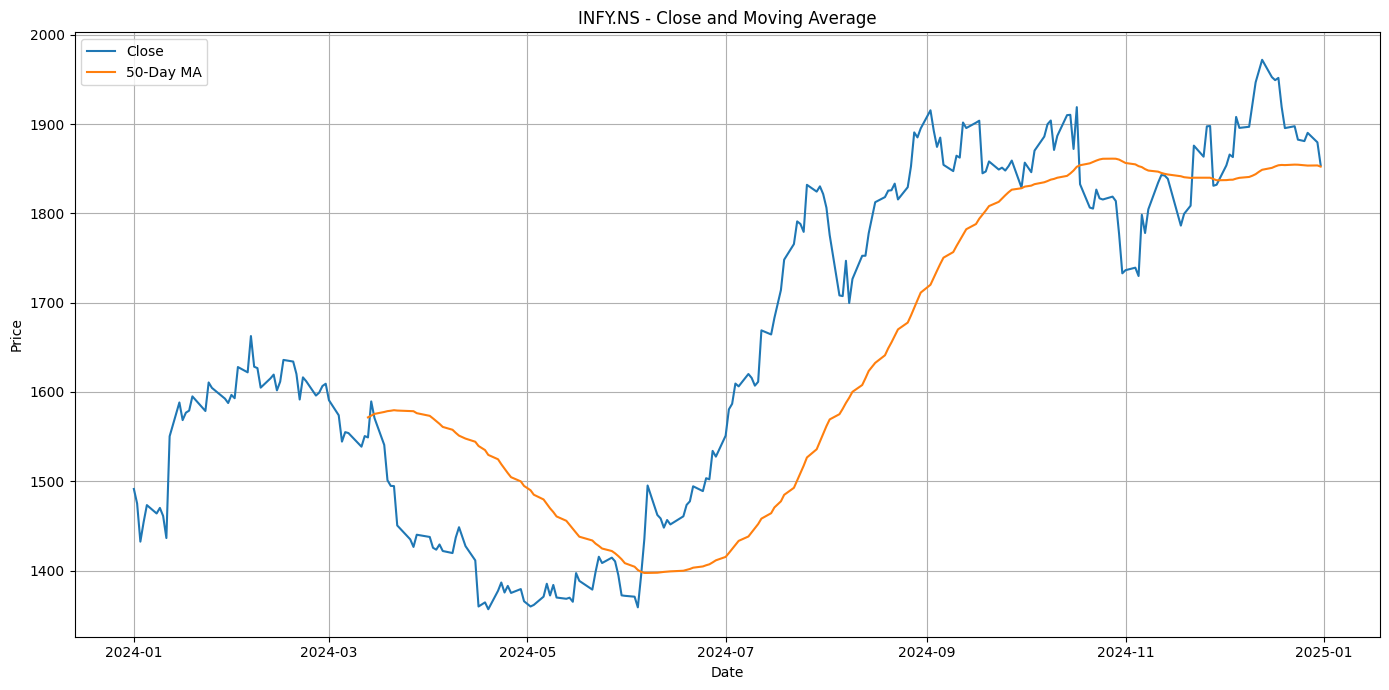

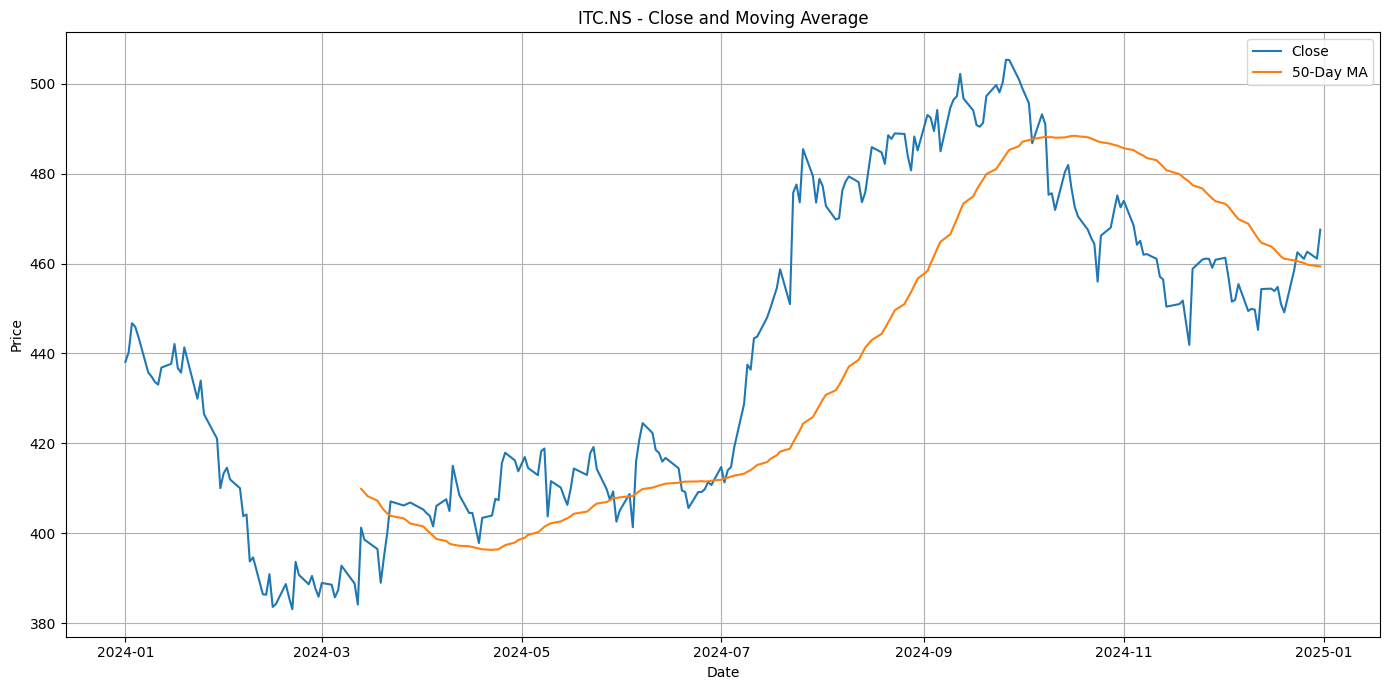

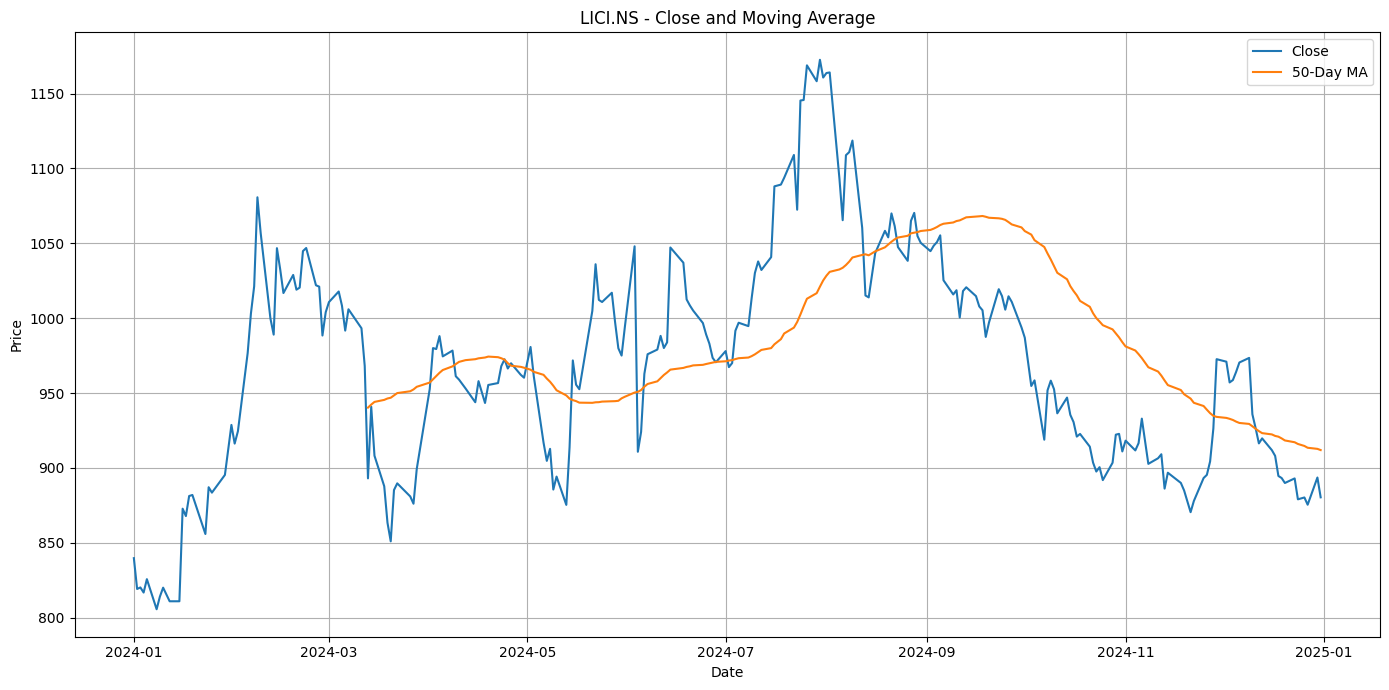

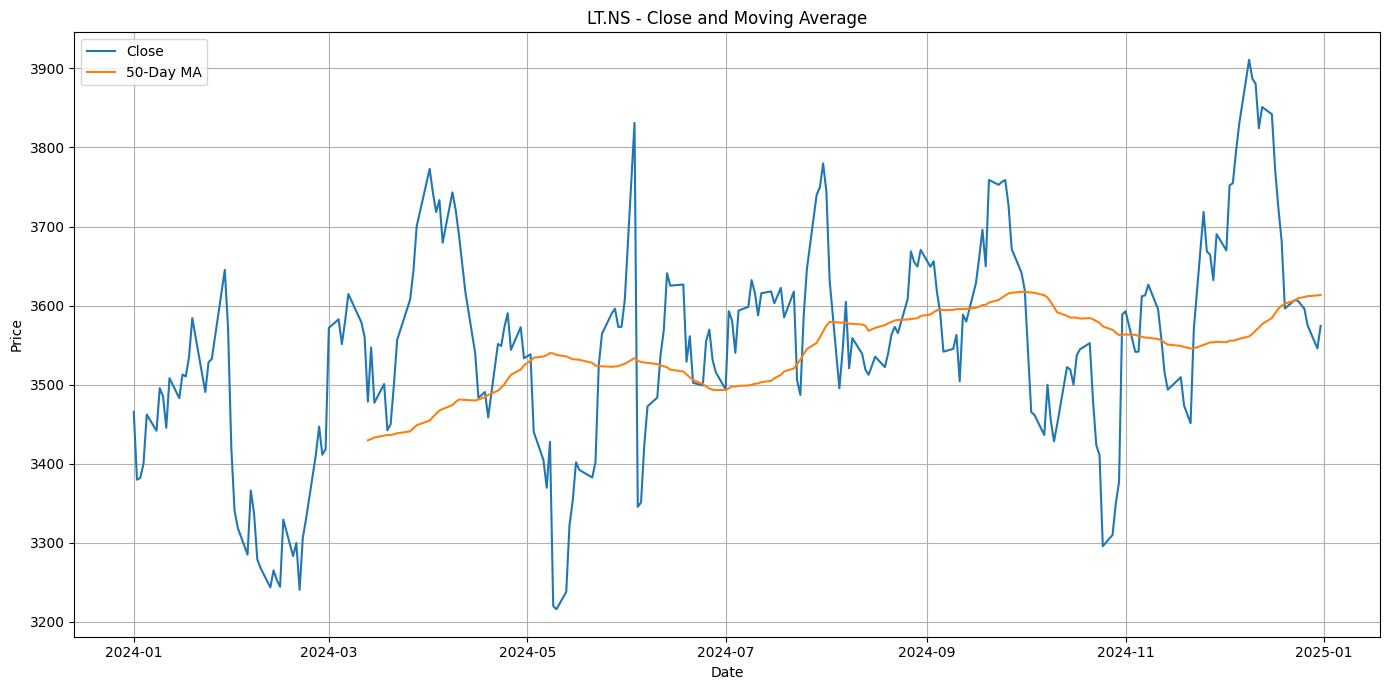

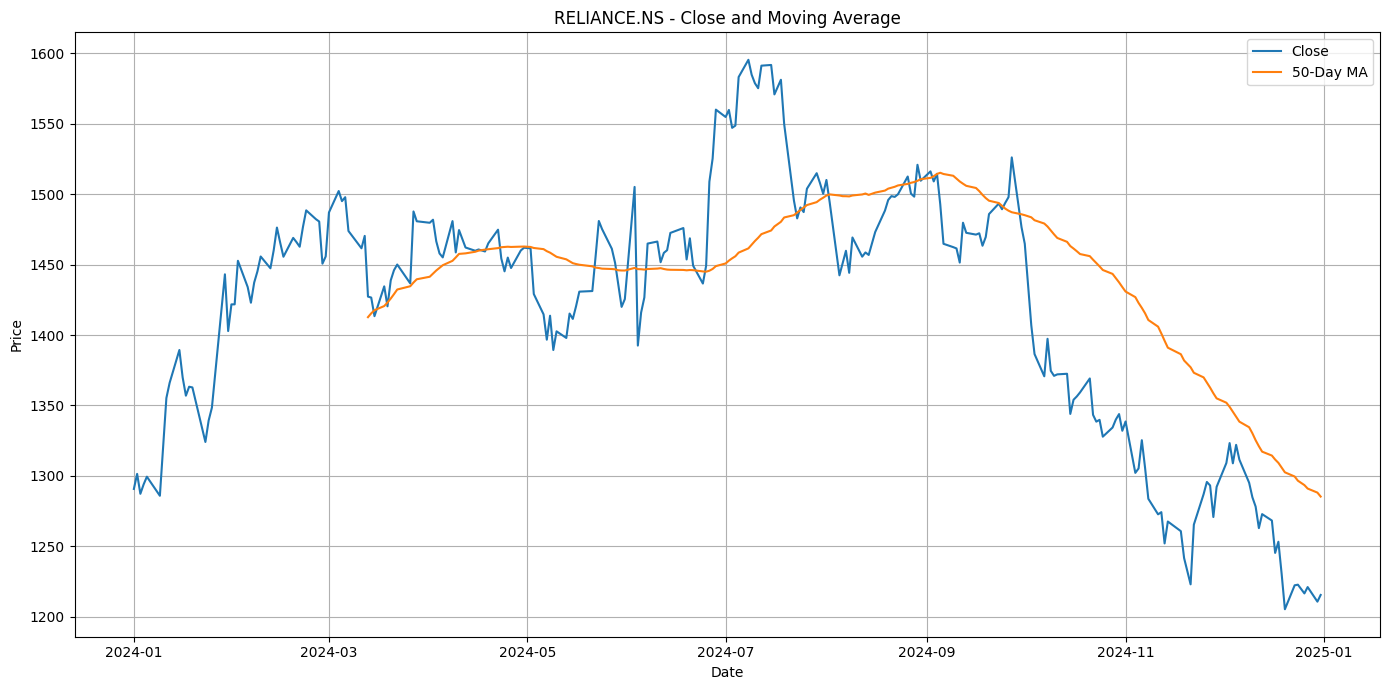

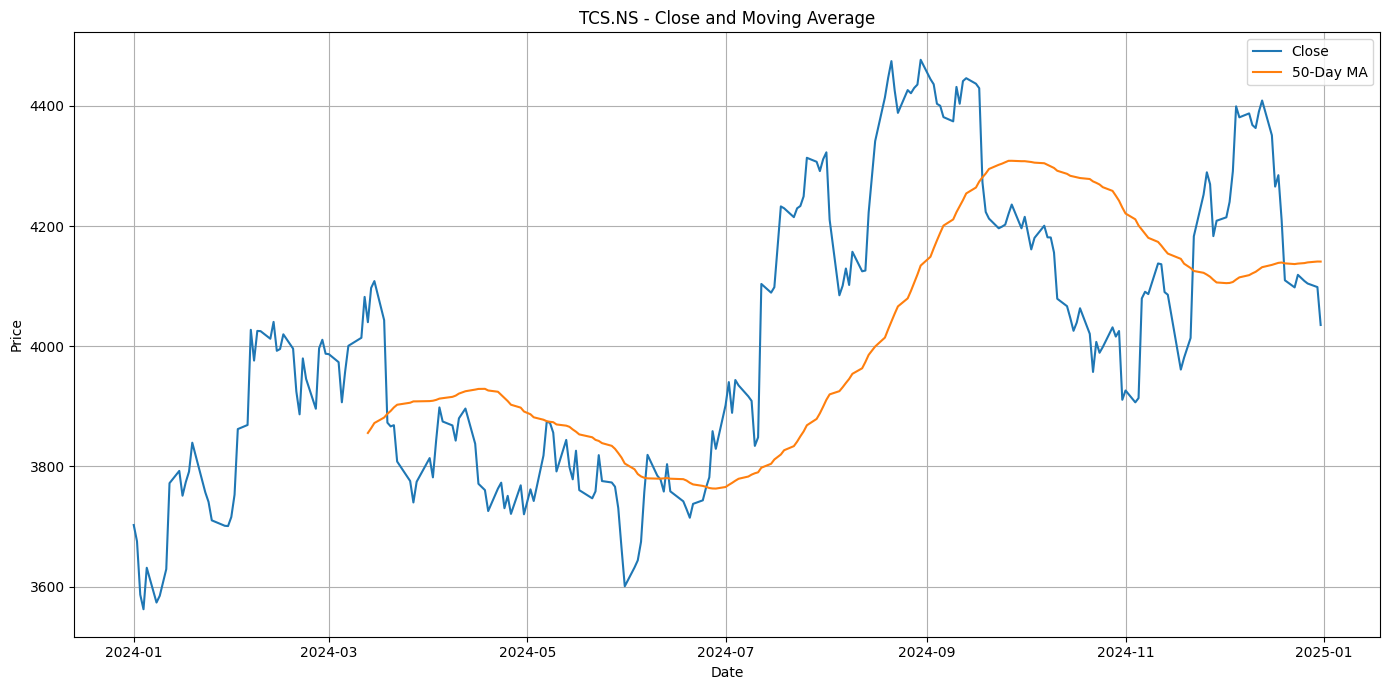

In [95]:
stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=50).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.title(f'{ticker} - Close and Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

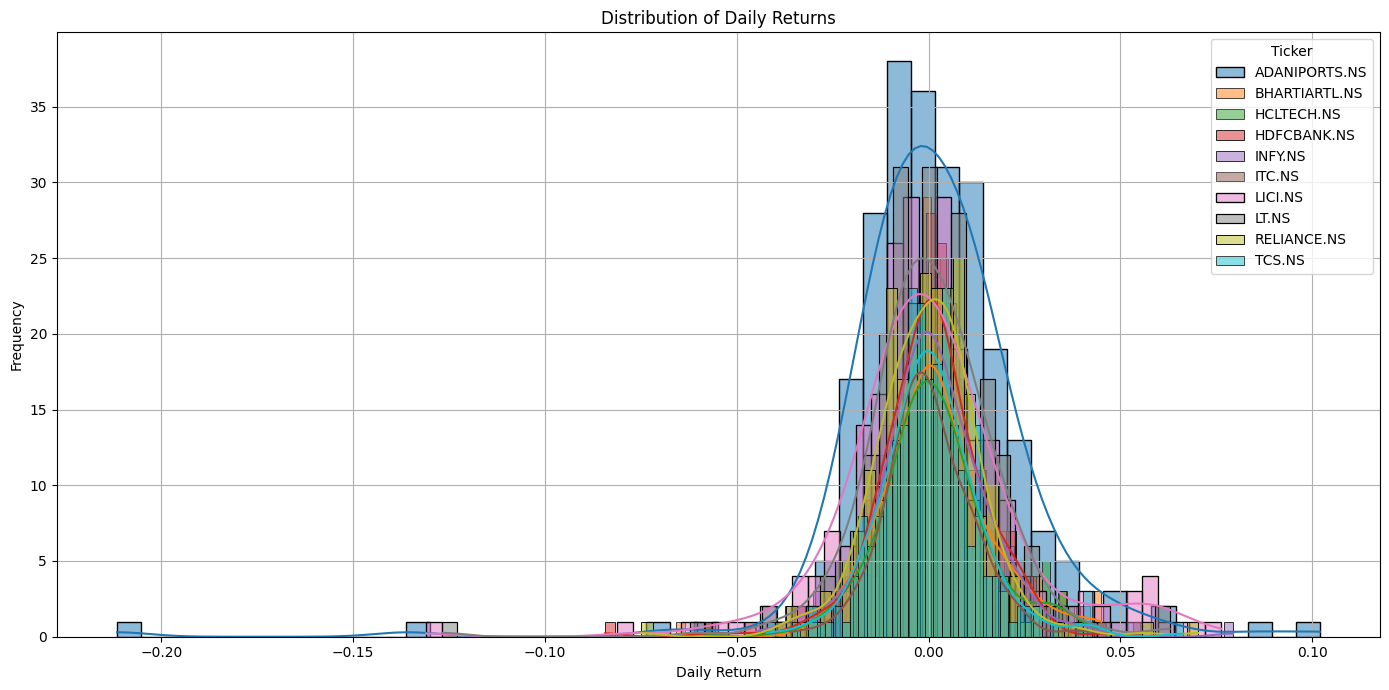

In [96]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
expected_returns = daily_returns.mean() * len(stock_data)/10
volatility = daily_returns.std() * np.sqrt(len(stock_data)/10)

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
ADANIPORTS.NS,0.250919,0.402532
BHARTIARTL.NS,0.483711,0.231121
HCLTECH.NS,0.317134,0.220549
HDFCBANK.NS,0.081546,0.221372
INFY.NS,0.243940,0.226374
ITC.NS,0.082541,0.186993
LICI.NS,0.115908,0.369760
LT.NS,0.070634,0.279740
RELIANCE.NS,-0.034743,0.226718


In [98]:
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

num_portfolios = 10000
results = np.zeros((3, num_portfolios))
cov_matrix = daily_returns.cov() * len(stock_data)/10
np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility

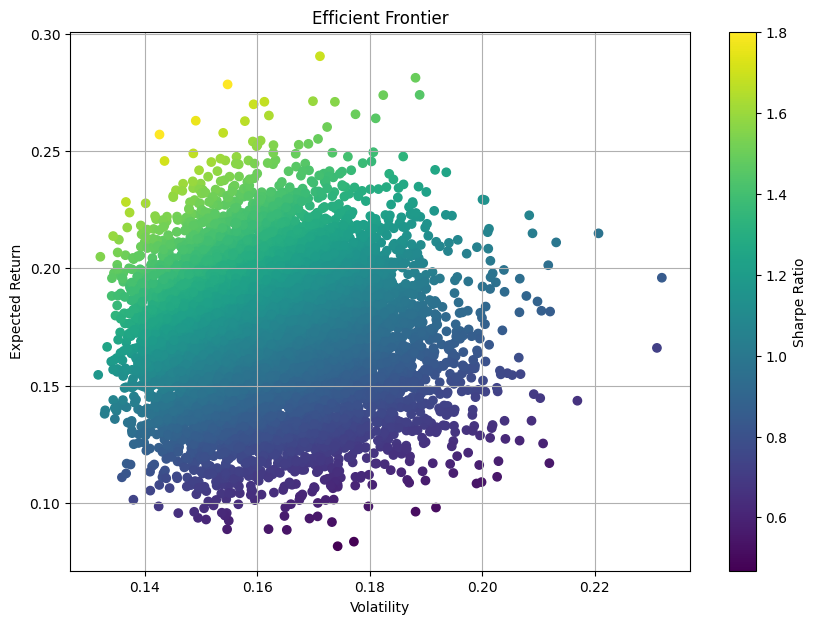

In [99]:
plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:])
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [100]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

In [101]:
max_sharpe_weights = np.zeros(len(unique_tickers))
np.random.seed(42)
for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(
        weights, expected_returns, cov_matrix
    )

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight%': max_sharpe_weights * 100
})

portfolio_weights_df.sort_values(by="Weight%", ascending=False, inplace=True)
portfolio_weights_df = portfolio_weights_df.head(5)

portfolio_weights_df["Weight%"] = (
    portfolio_weights_df["Weight%"] / portfolio_weights_df["Weight%"].sum() * 100
)

portfolio_weights_df.reset_index(drop=True, inplace=True)
portfolio_weights_df


,Ticker,Weight%
0,BHARTIARTL.NS,33.275693
1,HCLTECH.NS,23.337677
2,ITC.NS,17.806736
3,TCS.NS,13.679685
4,INFY.NS,11.900209


In [102]:
print(f"Maximum Returns: {max_sharpe_return * 100:.2f} %")
print(f"Volatility: {max_sharpe_volatility * 100:.2f} %")
print(f"Max Sharpe Ratio: {max_sharpe_ratio:.2f}")


Maximum Returns: 25.70 %
Volatility: 14.26 %
Max Sharpe Ratio: 1.80
